# Customer churn

A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. As analyst at this company we have to find out who is leaving and why.

# Import required libraries

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is D816-28B0

 Directory of C:\Users\luigi\Data_science_practice\Customer_Churn_Feature_Selection

07/09/2020  12:27 PM    <DIR>          .
07/09/2020  12:27 PM    <DIR>          ..
07/09/2020  12:02 PM    <DIR>          .ipynb_checkpoints
05/20/2020  11:30 AM            36,144 ChurnData.csv
07/09/2020  12:27 PM            15,387 Feature_selection.ipynb
07/09/2020  12:00 PM               141 README.md
               3 File(s)         51,672 bytes
               3 Dir(s)   2,803,605,504 bytes free


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# About the dataset
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.
This data set provides information to help us predict what behavior will help you to retain customers. We can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

You can find the dataset [here](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv).

In [4]:
ls

 Volume in drive C is OS
 Volume Serial Number is D816-28B0

 Directory of C:\Users\luigi\Data_science_practice\Customer_Churn_Feature_Selection

07/09/2020  12:27 PM    <DIR>          .
07/09/2020  12:27 PM    <DIR>          ..
07/09/2020  12:02 PM    <DIR>          .ipynb_checkpoints
05/20/2020  11:30 AM            36,144 ChurnData.csv
07/09/2020  12:27 PM            15,387 Feature_selection.ipynb
07/09/2020  12:00 PM               141 README.md
               3 File(s)         51,672 bytes
               3 Dir(s)   2,803,585,024 bytes free


# Load Data From CSV File

In [5]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [6]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [7]:
churn_df.isnull().any()

tenure      False
age         False
address     False
income      False
ed          False
employ      False
equip       False
callcard    False
wireless    False
longmon     False
tollmon     False
equipmon    False
cardmon     False
wiremon     False
longten     False
tollten     False
cardten     False
voice       False
pager       False
internet    False
callwait    False
confer      False
ebill       False
loglong     False
logtoll     False
lninc       False
custcat     False
churn       False
dtype: bool

There are 3 things that take my attention: 

1) All the features are numerical so can be used for feature selection 

2) Churn is our class label 

3) Feature don't includes NaN

# Lets define features (X), and target (y) variables for our dataset:

In [8]:
# Convert target variable to integer for sklearn algorithm
churn_df['churn'] = churn_df['churn'].astype('int')

In [10]:
# y includes our labels and x includes our features
y = churn_df['churn']                          # 1 or 0 

x = churn_df.drop('churn', axis = 1)
x.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0


In [12]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

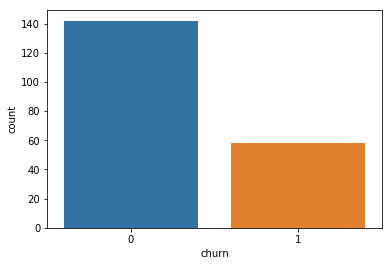

In [13]:
ax = sns.countplot(y, label="Count")

In [15]:
Staying, Leaving = y.value_counts()
print('Number of Customers Leaving: ',Leaving)
print('Number of Customers Staying : ',Staying)

Number of Customers Leaving:  58
Number of Customers Staying :  142


In [17]:
x.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.295000,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.457187,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000


# Data Normalization or Standardization

In order visualize the feature we need to normalize the data. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

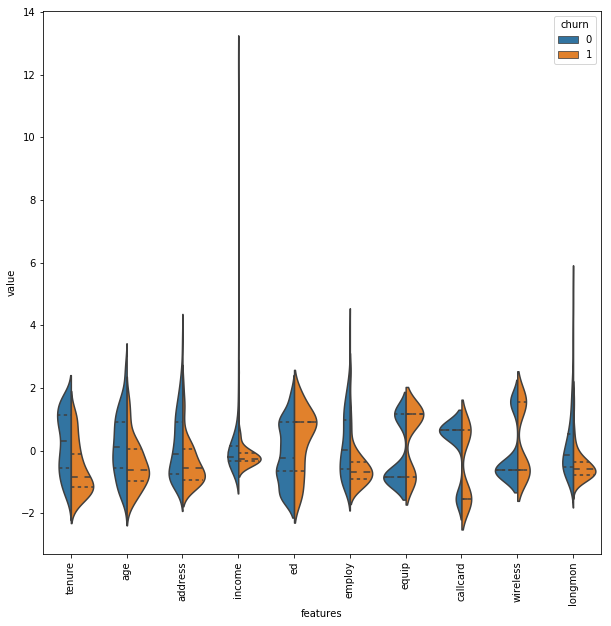

In [18]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="churn",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="churn", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Lets interpret the plot above together. For example, in adress feature, median of the targets variable looks like separated so it can be good for classification. However, in employ feature, median of the targets variable does not looks like separated so it does not gives good information for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

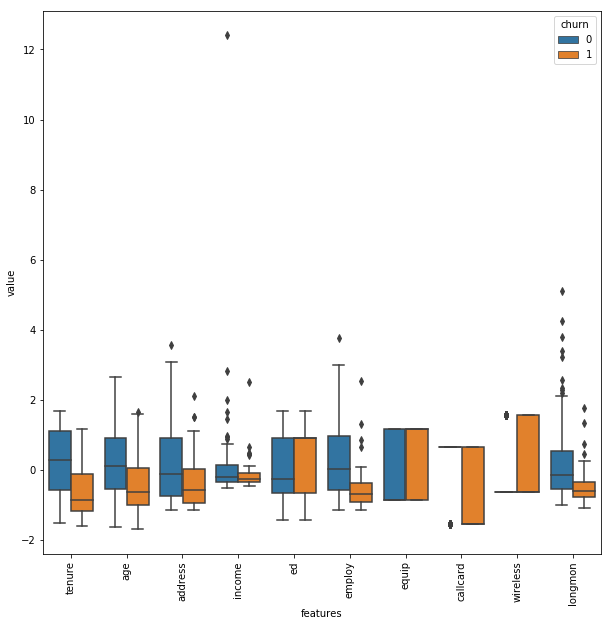

In [22]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="churn", data=data)
plt.xticks(rotation=90)

Check corr

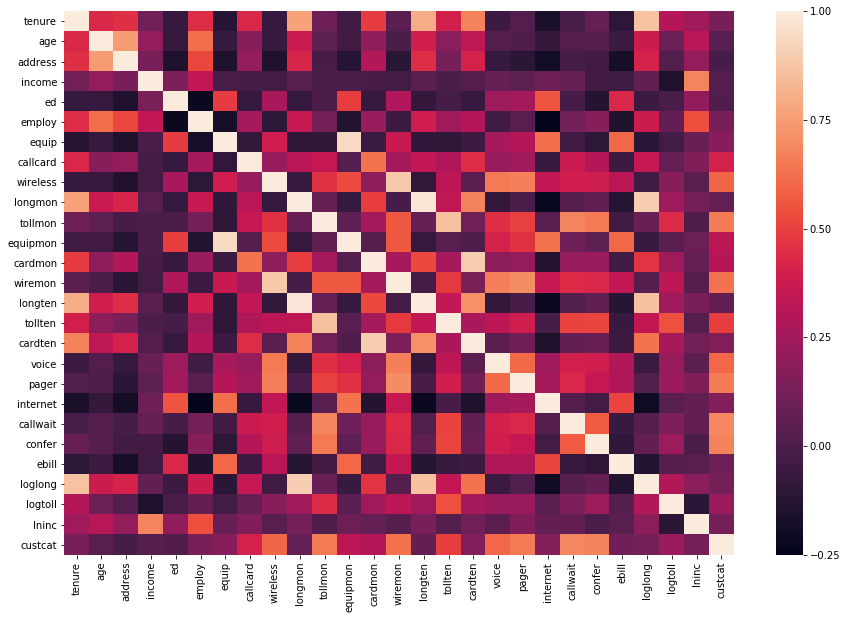

In [28]:
fig, ax = plt.subplots(figsize=(15,10))  
ax = sns.heatmap(x.corr())